# Twitter Challenge 1


## Recall that you were asked to retrieve ~ 10K tweets last week.

## Do the following:

1. Use any Python package(s) of your choice
2. Perform text pre-processing
3. Generate a word cloud
4. Post the word cloud (image) as a Tweet (using your own Twitter account).

### Briefly describe: what is the topic? what is the data period?
### Include #is434 #smu #scis hashtags in your tweet.

In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
df = pd.read_csv("omicron_tweets.csv")
tweets = df["Text"]

In [3]:
stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

In [4]:
results = [clean_tweet(tw) for tw in tweets]
results

/var/folders/5z/tmp48bwn5lx0cw1mmf31bzgm0000gn/T/ipykernel_48363/3843439895.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['stealth no cause alarm but could slow case decline nytimes wtf alert over cases caused by omicron cousin',
 '4 side note new york liberals deserve large credit not locking down because omicron scariant',
 'your jab does nothing omicron',
 'government eases social care restrictions restrictions place help prevent spread omicron adult social care will now be eased as plan b measures are removed following success booster programme',
 'its omicron stealth maybe they are just gonna come up with cute little names go after omicron but i feel like were stuck loop hell this isnt ever going away',
 'delta had one job it failed omicron is too weak',
 'olga you re uninformed low iq sheep studies japan have proven ivermectin efficacy against omicron',
 'kowa says showed antiviral effect against',
 'japans kowa says ivermectin showed antiviral effect against omicron reuters',
 'omicron killed 146 january 48 jammu alone',
 'could be true many triple vaxxed around here are catching omicron reason be

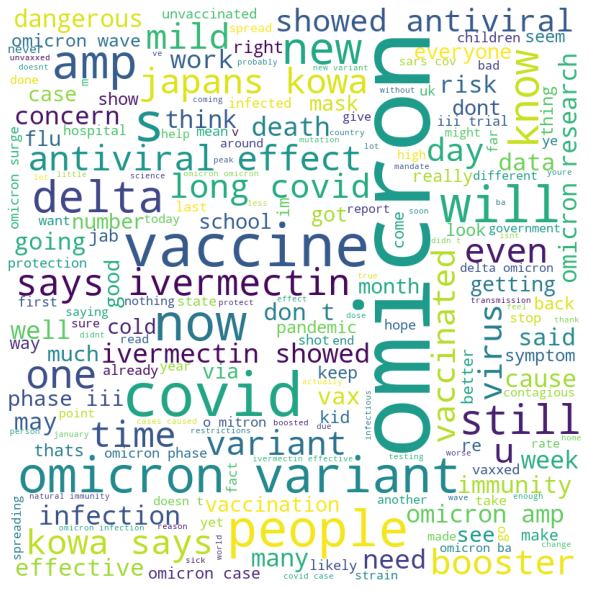

In [6]:
comment_words = ""

for tweet_text in results:
    tokens = tweet_text.split()
    comment_words += " ".join(tokens) + " "  
    
wordcloud = WordCloud(width=800, height=800,
                     background_color="white",
                     min_font_size = 10).generate(comment_words)

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()